## implementing a quick and simple Gaussian KDE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def gaussian_kernel(x, x_prime, gamma=0.5):
    diff = x - x_prime
    return np.exp(- gamma * (x - x_prime) ** 2)

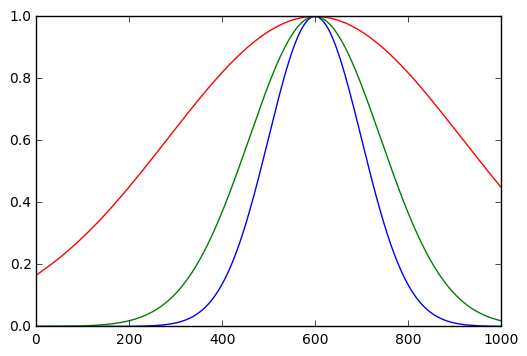

In [27]:
xs = np.array(list(np.arange(-5, 5, 0.01)))
plt.plot(gaussian_kernel(xs, 1, 0.5))
plt.plot(gaussian_kernel(xs, 1, 0.25))
plt.plot(gaussian_kernel(xs, 1, 0.05))

(array([  2.,   9.,  21.,  32.,  44.,  40.,  25.,  15.,   8.,   4.]),
 array([-2.16393651, -1.09427854, -0.02462056,  1.04503741,  2.11469538,
         3.18435336,  4.25401133,  5.3236693 ,  6.39332728,  7.46298525,
         8.53264322]),
 <a list of 10 Patch objects>)

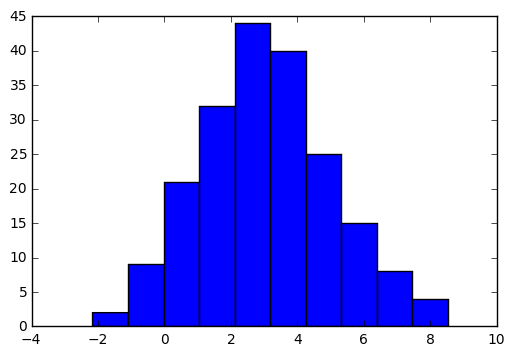

In [50]:
# generate data
data = np.random.normal(3, 2, 200)
plt.hist(data)

In [56]:
class KDE:
    def __init__(self, data, gamma=0.5):
        self.gamma = gamma
        self.data = data
    
    # Xs is the list of vals
    def getPDF(self, Xs):
        mf_Xs = np.array([np.sum(gaussian_kernel(pt, self.data, self.gamma)) for pt in Xs])
        #pmf_Xs = mf_Xs / np.sum(mf_Xs)
        return mf_Xs
    

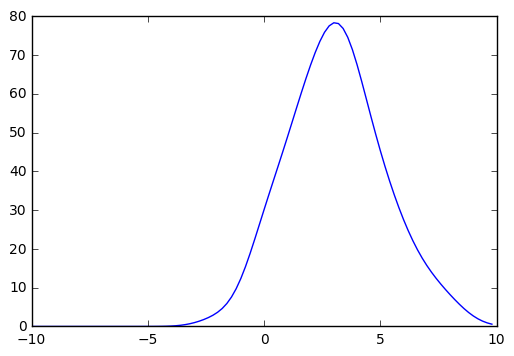

In [57]:
kde = KDE(data, gamma=0.75)
Xs = np.arange(-10,10,0.2)
pdf = kde.getPDF(Xs)
plt.plot(Xs, pdf)